<font color=red><b>Note:</b></font> This is an extension of ```"Understanding the Derivative"``` chapter in ```"Vehicle Motion and Control"``` of Udacity ```iSDC``` Nanodegree, thus specifically catered to that if the context is unclear. Viewers are advised to either read that before here, or have it opened along with it.  

The __aim__ is to clarify or provide more insights if Udacity's page is still unclear on the concept (especially python's inner functions)   

For general viewers, we will here see, how we could implement and plot derivatives using python's __inner functions__ capability, which is one of the most confusing (at least to me) concepts in python.

In many code blocks, the previously seen code snippets are repeated purposefully, to provide or recall the context in your memory easily though it is not efficient jupyter way

We will also not go in to physics concepts, focussing on python only

## 1 - Discrete Motion

We have a function f(t). We have say 5 points of z, and 5 points of f(t) known. Then we could plot a simple graph like below. 

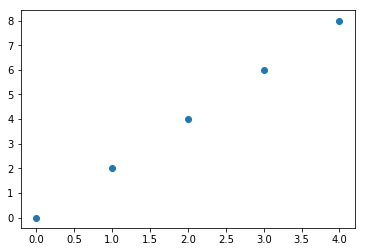

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
f_t = [0,2,4,6,8]

plt.scatter(t,f_t)  # note scatter is taking 2 lists, one is z and another f(z)
plt.show()

We could also formalize, if we know how to calculate f(t).  
For eg, $$f(t) = 2t$$

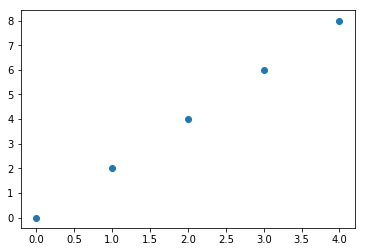

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]

def function_f(t):
    return 2*t

f_t = [function_f(x) for x in t]  # we create f(z) list of discrete numbers

plt.scatter(t,f_t)  # note scatter is taking 2 lists, one is z and another f(z) list
plt.show()

## 2 - Continous motion

What if we want continous plot? Though we get sensor inputs in discrete fashion, it is often useful to plot it continous, as higher frequency discrete input will only approximate to a confinuous function anyway. 

We could try that now, with same set of ```t``` and ```f(t)``` as above. Only change is instead of ```scatter```, now we could use ```plot```, which is not specifically emphasized in Udacity (instead, focus went to numpy)

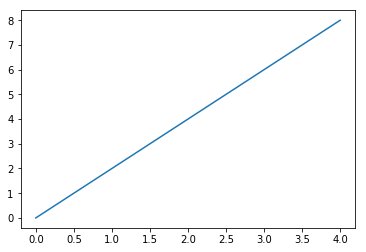

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
f_t = [0,2,4,6,8]

plt.plot(t,f_t)  # Note, instead of scatter we use plot, which is the only change.
plt.show()

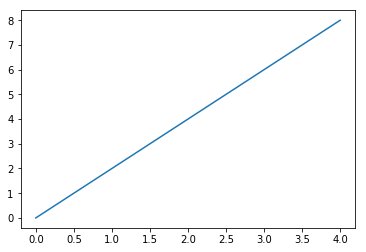

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]

def function_f(t):
    return 2*t

f_t = [function_f(x) for x in t]  # we create f(z) list of discrete numbers

plt.plot(t,f_t)  # note scatter is taking 2 lists, one is z and another f(z) list
plt.show()

__Using Numpy__

Now, 
```python
t = [0,1,2,3,4]
```
is not very pretty and practical. So we could use numpy to generate a set of values for us like below. 
```python
import numpy as np
t = np.linspace(0, 4)
```

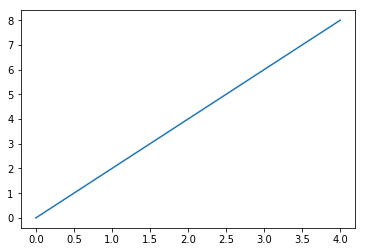

In [5]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,4)

def function_f(t):
    return 2*t

f_t = [function_f(x) for x in t]  # we create f(z) list of discrete numbers

plt.plot(t,f_t)  # note scatter is taking 2 lists, one is z and another f(z) list
plt.show()

Numpy also facilitates a simplification in matplotlib pyplot. Instead of generating f(t) list as below
```python
f_t = [function_f(x) for x in t]
plt.plot(t,f_t)
```
we could simply pass on function_f(t) as below. 
```python
plt.plot(t,function_f(t))
```
<font color=blue> Note this works only when t is a numpy array</font>. Modifying accordingly,..

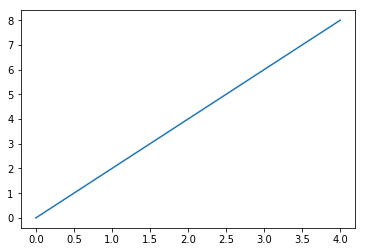

In [6]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,4)

def function_f(t):
    return 2*t

#f_t = [function_f(x) for x in t]  # NOT NEEDED. 

plt.plot(t,function_f(t))  # POSSIBLE IN PLOT ONLY BECAUSE t IS A NUMPY ARRAY
plt.show()

Make sure you remember this privilege we get with numpy, as further down, this goes unexplained.

## 3 - Position of a ball thrown up

Let us say, below is the position of a ball thrown upwards. It goes up, and then falls down to earth. We will plot its position at any time (vs) time. This will resemble an inverted, hmm, cup?

$$f(t)=-4.9t^2 + 30t$$

Let us plot it with last method we just saw, and a function to calculate plot as per formula above.

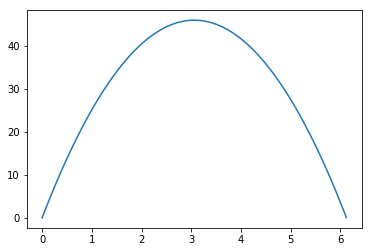

In [7]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,6.12)

# z(t) = f(t) = -4.9(t^2) + 30t
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

z = position_b(t)  # let us also use denotions as going forward. z is typically used for position/displacement

plt.plot(t,z)  # POSSIBLE IN PLOT ONLY BECAUSE t IS A NUMPY ARRAY
plt.show()

## 4. Velocity of same ball

The instantaneous velocity ```f_dot(t)``` of a ball given its instantaneous position ```f(t)``` would be, 

$$ \displaystyle \ddot{f}(t)=\underset{{\Delta t\to 0}}{\mathop{{\lim }}}\,\frac{{f(t+\Delta t)-f(t)}}{{\Delta t}}=\underset{{\Delta t\to 0}}{\mathop{{\lim }}}\,\frac{{f(t+\frac{{\Delta t}}{2})-f(t-\frac{{\Delta t}}{2})}}{{\Delta t}}$$

Let us plot it with last method we just saw, and a function to calculate plot as per formula above.

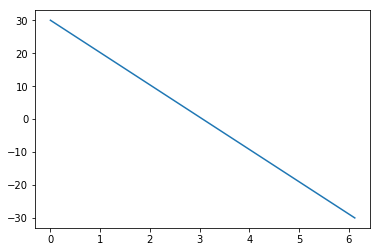

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,6.12)

# z(t) = f(t) = -4.9(t^2) + 30t
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# v(t) = f_dot(t) = -4.9(2*t) + 30 (specific derivation but here we will use generic formula as above)
def velocity_b(t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    z1 = position_b(t1)
    z2 = position_b(t2)
    f_dot = (z1-z2)/delta_t
    return f_dot

z = position_b(t)  # let us also use denotions as going forward. z is typically used for position/displacement
v = velocity_b(t)

plt.plot(t,v)  # POSSIBLE IN PLOT ONLY BECAUSE t IS A NUMPY ARRAY
plt.show()

## 4. Acceleration of same ball

The instantaneous acceleration ```f_double_dot(t)``` of a ball given its instantaneous velocity ```f_dot(t)``` would be, 

$$ \displaystyle \ddot{f}(t)=\underset{{\Delta t\to 0}}{\mathop{{\lim }}}\,\frac{{f(t+\Delta t)-f(t)}}{{\Delta t}}=\underset{{\Delta t\to 0}}{\mathop{{\lim }}}\,\frac{{f(t+\frac{{\Delta t}}{2})-f(t-\frac{{\Delta t}}{2})}}{{\Delta t}}$$

Let us plot it with last method we just saw, and a function to calculate plot as per formula above.

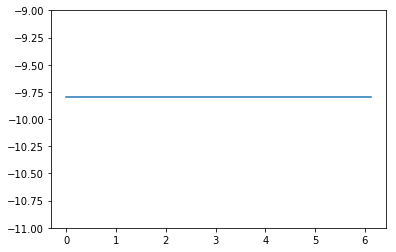

In [9]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,6.12)

# z(t) = f(t) = -4.9(t^2) + 30t
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# v(t) = f_dot(t) = -4.9(2*t) + 30 (specific derivation but here we will use generic formula as above)
def velocity_b(t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    z1 = position_b(t1)
    z2 = position_b(t2)
    f_dot = (z1-z2)/delta_t
    return f_dot

# a(t) = f_double_dot(t) = -4.9(2) = -9.8 (specific derivation but here we will use generic formula as above)
def acceleration_b(t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    z1 = velocity_b(t1)
    z2 = velocity_b(t2)
    f_double_dot = (z1-z2)/delta_t
    return f_double_dot


z = position_b(t)  # let us also use denotions as going forward. z is typically used for position/displacement
v = velocity_b(t)
a = acceleration_b(t)

plt.ylim([-11, -9])  # autoscale is too zoomed in. since approx derivative, this gives a weird curved line.so..
plt.plot(t,a)  # POSSIBLE IN PLOT ONLY BECAUSE t IS A NUMPY ARRAY
plt.show()

## 5. Function as argument

Note that, velocity and acceleration, almost use the same formula. So we could modularize as below. Note, how function  ```position_b``` and ```velocity_b``` are being passed as argument to ```approximate_derivative``` . We will also plot all 3 functions: position, velocity and acceleration at once.  

<font color=blue>Note:</font>We kinda already saw this concept while using ```numpy``` in ```plot```, but in that case, it had to be a function of numpy array else plot will not take it

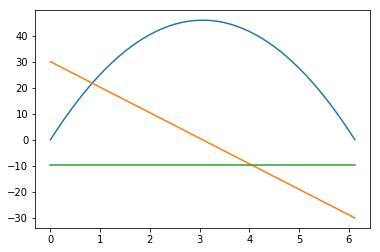

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(0,6.12)

# z(t) = f(t) = -4.9(t^2) + 30t
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of any input function of time
def approximate_derivative(function_f, t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = function_f(t1)
    f2 = function_f(t2)
    derivative = (f1-f2)/delta_t
    return derivative

# v(t) = f_dot(t) = -4.9(2*t) + 30 
def velocity_b(t):
    f_dot = approximate_derivative(position_b, t)
    return f_dot

# a(t) = f_double_dot(t) = -4.9(2) = -9.8 
def acceleration_b(t):
    f_double_dot = approximate_derivative(velocity_b, t)
    return f_double_dot


z = position_b(t)         # position
v = velocity_b(t)         # velocity
a = acceleration_b(t)     # acceleration

#plt.ylim([-11, -9])  # autoscale is too zoomed in. since approx derivative, this gives a weird curved line.so..
plt.plot(t,z)  
plt.plot(t,v)  
plt.plot(t,a)  
plt.show()

## <font color=red>6. Inner functions</font>

Python has a concept of inner functions. We could define a function called ```factory function```, and then define another function inside called ```inner fucntions```, like a variable.  

The inner function is hidden from outside world, cannot be accessed.  

Let us understand how it works by a simple example as below.

In [11]:
def outer(num1):
       
    def inner_increment(num1):  # hidden from outer code
        return num1 + 1
    
    num2 = inner_increment(num1)  #inner_increment(10)
    print(num1, num2)


outer(10)

10 11


1. outer(10) calling ```outer``` factory function with argument ```numw```
2. we simply call inner function ```inner_increment``` with argument  ```num1``` we got from factory function ```outer```
3. We could now use that result anyway we want. 

Yeek, what's the point? Let us go on.

In [12]:
def generate_power(number):  # 'number' is our outer or factory variable

    def nth_power(power):
        return number ** power # 'power' is our inner function variable

    return nth_power  

power = 7         # inner function variable
number = 2        # factory function variable
raise_two = generate_power(number)    # raise_two is a new function each time its called provided by 'factory'
raise_two(power)                      # We now call with inner variable as we saw in earlier example

128

<font color=red>Note: </font> 
1. Because factory function returns the inner function, in below line ```raise_two``` gets a __snapshot__ of the inner function __nth_power__. 
```python
raise_two = generate_power(number)  # think why this should return a function 
```
2. Now we have a __snapshot__ of inner function with name ```raise_two```, so we could call with argument appropriate/needed for inner function as if we are calling inner function directly. 
```python
raise_two(power)
```
3. If you try to access ```nth_power```, you will only get error as below as it is not accessible directly.  
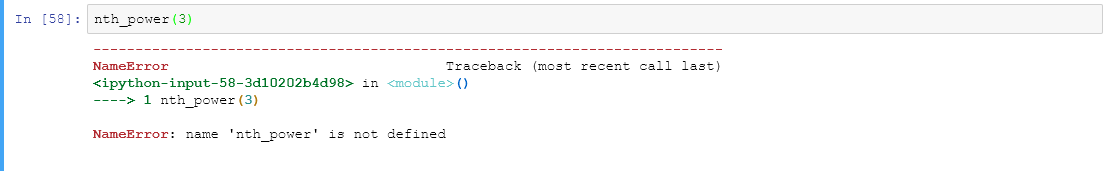

Below would be the simpler equivalent of what we did with inner function above. 

In [13]:
def nth_power(number, power):
    return number ** power  

power = 7         # inner function variable
number = 2        # factory function variable
nth_power(2, 7)

128

So why bother doing an inner function at all? Well, it helps sometimes in many ways beyond the scope of this article, but for now, let us just understand how it works in our case. Before that, let us also amalgamate, passing function to a function with inner functions. 

In [14]:
def test_function(t):
    return 2*t

def generate_linear(f):     # 'f' is our outer or factory variable

    def linear(t):          # 't' is our inner variale
        return f(t)

    return linear  

t = 2                               # inner function variable
z = test_function                   # factory function variable, WHICH IS A FUNCTION NAME
get_linear = generate_linear(z)     # pass factory function variable, get back a function 'get_linear'
get_linear(2)                       # pass inner function variable to 'get_linear'

4

Let us now, try to transform to our familiar velocity calculation. 

In [15]:
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of position function
def approximate_derivative(t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = position_b(t1)                    # FOR NOW, MAKING IT TO VELOCITY ALONE
    f2 = position_b(t2)
    derivative = (f1-f2)/delta_t
    return derivative

def get_derivative(f):     # 'f' is our outer or factory variable which is a function

    def f_dot(t):          # 't' is our inner variale
        return f(t)

    return f_dot  


t = 3.45                            # inner function variable (with t as used in udacity example)
z_t = approximate_derivative        # factory function variable, WHICH IS A FUNCTION NAME
v_t = get_derivative(z_t)           # pass factory function variable, get back a function 'v_t'
v_t(t)                              # pass inner function variable to 'get_linear'    

-3.809999999994318

Note that, ```approximate_derivative``` is using ```position_b``` hardcoded function. We already generalized earlier. Let us generalize ```approximate_derivative```, so now it also takes function along with time. Since now, there are 2 arguments, we could also manipulate, what we pass as factory argument as below.

In [16]:
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of position function
def approximate_derivative(f, t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = f(t1)                    # GENERALIZED
    f2 = f(t2)
    derivative = (f1-f2)/delta_t
    return derivative

def get_derivative(f):     # 'f' is our outer or factory variable which is a function

    def f_dot(t):          # 't' is our inner variale
        return approximate_derivative(f, t)

    return f_dot  

# POSITION
t = 3.45                            # inner function variable (with t as used in udacity example)
z_t = position_b                    # factory function variable, WHICH IS A FUNCTION NAME
z = z_t(t)                          
print('position at {}:{}'.format(t,z))

# VELOCITY
v_t = get_derivative(z_t)           # pass factory function variable, get back a function 'v_t'
v = v_t(t)                          # pass inner function variable to 'get_linear'   
print('velocity at {}:{}'.format(t,v))                               

position at 3.45:45.177749999999996
velocity at 3.45:-3.809999999994318


Wow. It works. But now, the beauty is, we could easily extend to acceleration. Think of it. Acceleration is again derivative of velocity (just like velocity is derivative of position).  

Since ```z_t``` would be velocity function (_snapshot_ from factory _get_derivative_), we could pass on it again as a factory function variable to get acceleration. Let us try it out

In [17]:
def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of position function
def approximate_derivative(f, t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = f(t1)                    # GENERALIZED
    f2 = f(t2)
    derivative = (f1-f2)/delta_t
    return derivative

def get_derivative(f):     # 'f' is our outer or factory variable which is a function

    def f_dot(t):          # 't' is our inner variale
        return approximate_derivative(f, t)

    return f_dot  

# POSITION
t = 3.45                            # inner function variable (with t as used in udacity example)
z_t = position_b                    # factory function variable, WHICH IS A FUNCTION NAME
z = z_t(t)                          
print('position at {}:{}'.format(t,z))

# VELOCITY
v_t = get_derivative(z_t)           # pass factory function variable, get back a function 'v_t'
v = v_t(t)                          # pass inner function variable to 'get_linear'   
print('velocity at {}:{}'.format(t,v))                               

# ACCELERATION
a_t = get_derivative(v_t)           # earlier returned function z_t now becomes factory variable function 
a = a_t(t)
print('acceleration at {}:{}'.format(t,a))    

position at 3.45:45.177749999999996
velocity at 3.45:-3.809999999994318
acceleration at 3.45:-9.800000000836917


## 7. Plotting them all

Remember, ```z_t``` and ```a_t``` are functions. Instead of ```t at any instant``` , we could now generate ```a numpy array``` as we saw few code blocks above and assign to ```t```. 

Then we could simply pass ```t```,```z_t```,```a_t``` and try to plot them.

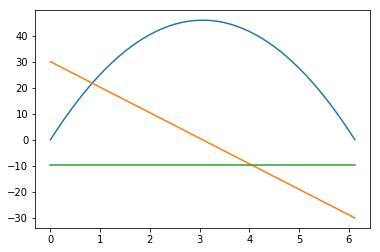

In [18]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of position function
def approximate_derivative(f, t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = f(t1)                    # GENERALIZED
    f2 = f(t2)
    derivative = (f1-f2)/delta_t
    return derivative

def get_derivative(f):     # 'f' is our outer or factory variable which is a function

    def f_dot(t):          # 't' is our inner variale
        return approximate_derivative(f, t)

    return f_dot  

t = np.linspace(0,6.12)       # GENERATE NUMPY ARRAY which is also now an INNER FUNCTION

# POSITION, VELOCITY, ACCELERATION
z_t = position_b                    # factory function variable, WHICH IS A FUNCTION NAME
v_t = get_derivative(z_t)           # pass factory function variable, get back a function 'z_t'
a_t = get_derivative(v_t)           # earlier returned function z_t now becomes factory variable function 

plt.plot(t,z_t(t))    # position as function of 't'
plt.plot(t,v_t(t))    # velocity as derivative of 'position'
plt.plot(t,a_t(t))    # acceleration as derivative of 'velocity'
plt.show()

__Optional__

Just to be more comparable with Udacity convention, we could further optimize/modularize by creating another function ```plot_continuous_function```, which could do the plot as below
```python
def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)
```

Below is the snippet which we are going to optimize to use above function
```python
t = np.linspace(0,6.12)       # GENERATE NUMPY ARRAY which is also now an INNER FUNCTION

# POSITION, VELOCITY, ACCELERATION
z_t = position_b                    # factory function variable, WHICH IS A FUNCTION NAME
v_t = get_derivative(z_t)           # pass factory function variable, get back a function 'z_t'
a_t = get_derivative(v_t)           # earlier returned function z_t now becomes factory variable function 

plt.plot(t,z_t(t))    # position as function of 't'
plt.plot(t,v_t(t))    # velocity as derivative of 'position'
plt.plot(t,a_t(t))    # acceleration as derivative of 'velocity'
plt.show()
```

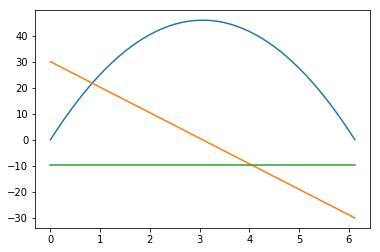

In [20]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)

def position_b(t):  # _b is for ball?!
    return (-4.9*t*t + 30*t)

# approximate derivative of position function
def approximate_derivative(f, t):
    delta_t = 0.001
    t1 = t + delta_t/2
    t2 = t - delta_t/2
    f1 = f(t1)                    # GENERALIZED
    f2 = f(t2)
    derivative = (f1-f2)/delta_t
    return derivative

def get_derivative(f):     # 'f' is our outer or factory variable which is a function

    def f_dot(t):          # 't' is our inner variale
        return approximate_derivative(f, t)

    return f_dot  

t_min = 0
t_max = 6.12
#t = np.linspace(0,6.12)       # GENERATE NUMPY ARRAY which is also now an INNER FUNCTION

# POSITION, VELOCITY, ACCELERATION
velocity_b = get_derivative(position_b)           
acceleration_b = get_derivative(velocity_b)       

plot_continuous_function(position_b,t_min,t_max)
plot_continuous_function(velocity_b,t_min,t_max)
plot_continuous_function(acceleration_b,t_min,t_max)